# MATH 248 Project

## The trajectory of a projectile

An airgun shot a pellet with a mass $m$ at an angle $\theta$ into the air. The speed of the pellet is $v_0$ and the position is $(0, y_0)$ when it leaves the barrel. Assuming the air resistance is proportional to the velocity with a coefficient $r$. Let $x(t)$ and $y(t)$ be the horizontal and vertical position (i.e, the x- and y-coordinates) of the pellet at time $t$.

* The horizontal direction: the air resistance is the only force. According to Newton's second law of motion, 
$$\ddot x(t) = -\frac{r}{m}\dot x(t)$$

* The vertical direction: two forces act on the pellet, the air resistance and the gravity. Let $g$ be the gravitational constant, 
$$\ddot y(t) = -g -\frac{r}{m}\dot y(t)$$

The trajectory is the parametric curve $(x(t), y(t))$. Find the solutions $x(t)$ and $y(t)$ using symbolic calculations. 


In [1]:
from sympy import *
from scipy.constants import g as G
from scipy.optimize import fsolve, minimize
from numpy import linspace, arange, zeros, pi, sqrt
from matplotlib.pyplot import plot, figure, axis
from matplotlib.animation import FuncAnimation
from IPython.display import HTML

In [2]:
r, m, g, t = symbols("r, m, g, t")
x0, y0, v0 = symbols("x0, y0, v0")
theta, dx0, dy0 = symbols("theta, d_x, d_y")
x = Function("x")
y = Function("y")

hd = Eq(diff(x(t), t, 2)+(r/m)*diff(x(t), t), 0)
x_t = dsolve(hd, ics={x(0):x0, x(t).diff("t").subs({t:0}):dx0})
display(x_t)

vd = Eq(diff(y(t), t, 2)+g+(r/m)*diff(y(t), t), 0)
y_t = dsolve(vd, ics={y(0):y0, y(t).diff("t").subs({t:0}):dy0})
display(y_t)

Eq(x(t), -d_x*m*exp(-r*t/m)/r + (d_x*m + r*x0)/r)

Eq(y(t), -g*m*t/r + (-d_y*m*r - g*m**2)*exp(-r*t/m)/r**2 + (d_y*m*r + g*m**2 + r**2*y0)/r**2)

## Maximum range

Consider the following parameter values: the friction coefficient $r=0.001$, the mass of the pellet is $m=14.3$ grain $\approx 9.3\times 10^{-4}$ kilogram, the initial position of the pellet is $x_0=0$, $y_0=2$, the initial velocity is $v_0=274$ meters per second.

For any given $\theta$, numerically find the time $T$ the pellet hitting the ground, i.e., $y(T)=0$. In general, this defines a numerical function $T(\theta)$. The maximum range is $R_M=x(T)$.

Note that, because $T$ is a function of $\theta$, so is $R_M$. Plot $R_M(\theta)$ for $0\leq\theta\leq90^\circ$

* Hint: The function $y(t)=0$ cannot be solved symbolically as this is a transcendental function. You need to solve it numerically, e.g., using **fsolve**.

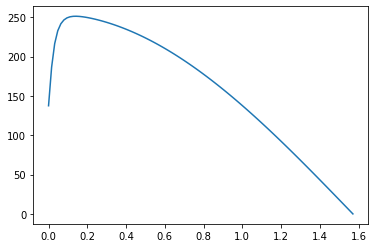

In [3]:
def R(theta):
    
    dy = y_t.rhs
    yt = lambdify(t, dy.subs({r:0.001, m:9.3e-4, g:G, y0:2, v0:274, dy0:v0*sin(theta)}))
    
    T = fsolve(yt, x0=5)
    
    dx = x_t.rhs
    xt = lambdify(t, dx.subs({r:0.001, m:9.3e-4, g:G, x0:0, y0:2, v0:274, dx0:v0*cos(theta), dy0:v0*sin(theta)}))
    
    return xt(T)

tval = linspace(0, pi/2, 100)
rg = zeros(100)

for i in range(100):
    rg[i] = R(tval[i])

plot(tval, rg)

## Effective range

The speed of a pellet can be computed as
$$
v(t) = \sqrt{\dot x^2(t)+\dot y^2(t)}
$$

A pellet can penetrate human skin at a speed about 100 meters/second.  Find the largest time $T_e$ such that
$v(T_e)\geq100$ and $y(T_e)\geq0$. Then the effective range is

$$R_e = \sqrt{x^2(T_e)+y^2(T_e)}$$

Plot $R_e$ as a function of $\theta$ for $0\leq\theta\leq15^\circ$

* Hint: $T_e$ is the earlier one of the two time $T_{100}$ when $v(T_{100})=100$ and $T_M$ when the pellet hit the ground.

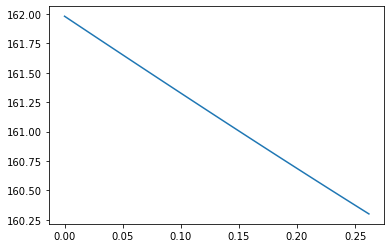

In [6]:
def effrange(theta):
    
    dy = y_t.rhs
    yt = lambdify(t, dy.subs({r:0.001, m:9.3e-4, g:G, y0:2, v0:274, dy0:v0*sin(theta)}))
    
    dx = x_t.rhs
    xt = lambdify(t, dx.subs({r:0.001, m:9.3e-4, g:G, x0:0, y0:2, v0:274, dx0:v0*cos(theta), dy0:v0*sin(theta)}))
    
    diffy = diff(y_t.rhs, t)
    diffx = diff(x_t.rhs, t)
    
    v_t100 = (diffx**2+diffy**2)**0.5-100
    vt = lambdify(t, v_t100.subs({r:0.001, m:9.3e-4, g:G, x0:0, y0:2, v0:274, dx0:v0*cos(theta), dy0:v0*sin(theta)}))
    
    Te = fsolve(vt, x0=1)[0]
    
    Re = (xt(Te)**2+yt(Te)**2)**0.5
    
    return Re

tval2 = linspace(0, pi/12, 100)
rg2 = zeros(100)

for j in range(100):
    rg2[j] = effrange(tval2[j])
    
plot(tval2, rg2)

## Animation

Make an animation showing how the trajectory changes with $\theta$, for $\theta=0^\circ, 1^\circ, ..., 45^\circ$. For each frame (a $\theta$ value), plot two curves:
* the full trajectory as a blue curve, i.e., parametric curve $(x(t), y(t))$ for $0\leq t\leq T$ until the pellet hit the ground at time $T$.
* the effective part of the trajectory as a red curve, i.e., $(x(t), y(t))$ for $0\leq t\leq T_e$ until the pellet has a velocty equal to 100 meters per second at time $T_e$.

In [9]:
fig = figure()
tval3 = linspace(0, pi/4, 100)

xt = lambdify(t, x_t.rhs.subs({r:0.001, m:9.3e-4, g:G, x0:0, y0:2, v0:274, dx0:v0*cos(theta), dy0:v0*sin(theta)}))
yt = lambdify(t, y_t.rhs.subs({r:0.001, m:9.3e-4, g:G, y0:2, v0:274, dy0:v0*sin(theta)}))

axis([xt(0), yt(0), xt(T), yt(T)])
paracurve = plot(xt, yt, "-b", [], [], "*g")

def update(tval3):
    paracurve[1].set_data([xt(tval3)], [yt(tval3)])

anim = FuncAnimation(fig, update, frames=tval3)
HTML(anim.to_html5_video())

TypeError: loop of ufunc does not support argument 0 of type Symbol which has no callable cos method

<Figure size 432x288 with 0 Axes>

In [10]:
fig2 = figure()
tval3 = linspace(0, pi/4, 100)

xt = lambdify(t, x_t.rhs.subs({r:0.001, m:9.3e-4, g:G, x0:0, y0:2, v0:274, dx0:v0*cos(theta), dy0:v0*sin(theta)}))
yt = lambdify(t, y_t.rhs.subs({r:0.001, m:9.3e-4, g:G, y0:2, v0:274, dy0:v0*sin(theta)}))

axis = ([xt(0), yt(0), xt(Te), yt(Te)])
partialcurve = plot(xt, yt, "-r", [], [], "*y")

def update(tval3):
    partialcurve[1].set_data([xt(tval3)], [yt(tval3)])

anim = FuncAnimation(fig2, update, frames=tval3)
HTML(anim.to_html5_video())

NameError: name 'dx' is not defined

<Figure size 432x288 with 0 Axes>